### Bethe-Bloch approximation

A (physically) more complete approximation is the so-called Bethe & Bloch formula:

$$
\frac{S}{\rho} = 4\pi N_A r^2_em_ec^2\frac{Z}{A}\frac{z^2}{\beta^2}\left[\ln \frac{2m_ec^2\gamma^2\beta^2}{I}-\beta^2\right]
$$

with $\rho$ the mass density of the material, and $N_A$ is Avogadro's number [mol<sup>-1</sup>], $r_e$ is the classical electron radius [m], $m_e$ is the mass of an electron [MeV], $z$ is the charge of the projectile [-], $Z$ is the atomic number of the absorbing material [-], $c$ is speed of light [m/s], $\beta = v/c$ with $v$ the velocity of the projectile [m/s], Lorentz factor $\gamma = (1- \beta^2)^{-1/2}$ and $I$ is the mean excitation energy of the absorbing material [MeV].

$A$ is described as the 'atomic mass' and 'mass number'. Note that this formula can only be dimensionally correct if $A$ has the dimension of [g mol$^{-1}$] and given the value of 1 ([source](https://alpha.physics.uoi.gr/foudas_public/APP/Lecture4-EnergyLoss.pdf#:~:text=Here%20is%20how%20one%20would%20use%20Fig.%203,stop%20them.%20The%20carbon%20density%20is%202.265%20g%2Fcm3.)). 

We can simplify this formula a bit by lumping most constants into a single one:

$$
\frac{S}{\rho} = K \frac{Z}{A} \frac{z^2}{\beta^2}\left[\ln \frac{2m_ec^2\gamma^2\beta^2}{I}-\beta^2\right]
$$

with 

$$
K = 4\pi N_A r^2_em_ec^2
$$

K resolves to 0.307 MeV cm<sup>2</sup>/g. Note that K is the only term with a dimension in this formula. All other terms are dimensionless, so the unit of K is the unit of S over $\rho$. 

We will see that the above formula works quite well in the ranges of the **initial** energy of the proton. However, as the proton travels through the medium (body), it loses energy and the formula fails: 

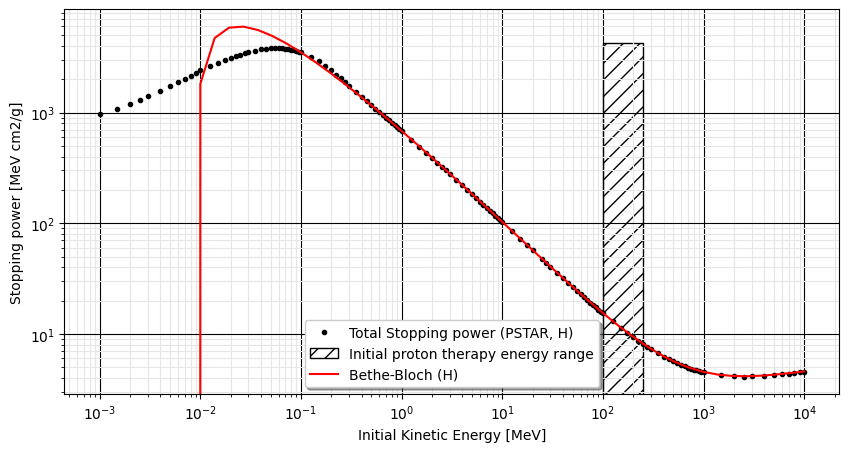

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import protonic  
import constants as const

# A proton traversing hydrogen gass
data = protonic.PSTAR("H")
p = protonic.projectiles.get('proton')

# Functions
# note, this formula is also available in protonic as bethebloch
beta = lambda Ek:  (1-(Ek/p.E0 + 1)**-2)**0.5
gamma = lambda Ek:  (1-beta(Ek)**2)**-0.5
K = 4*np.pi*const.Na*const.re**2*const.mec2  # MeV cm2 / g
bethe = lambda Ek, material, projectile: K * projectile.z**2 * material.Z / material.A * 1 / beta(Ek)**2 * (np.log(2*const.mec2*beta(Ek)**2/(material.I*(1-beta(Ek)**2))) - beta(Ek)**2)

# Plotting
fig, ax = plt.subplots(1, figsize=(10,5))

# Plot data
ax.plot(data.T[0], data.T[3], '.k', label="Total Stopping power (PSTAR, H)")

# Plot proton therapy application range
ax.fill_betweenx([0, 1.1*max(data.T[3])], 100, 250, 
                 hatch="//",
                 edgecolor='k', 
                 facecolor="white", 
                 label="Initial proton therapy energy range")

# Plot Bethe-Bloch formula
x = np.logspace(-3, 4)
ax.plot(x, bethe(x, 
                protonic.elements.get("H"), 
                protonic.projectiles.get('proton')), '-', color='r', label='Bethe-Bloch (H)')

# set labels and log scales
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Initial Kinetic Energy [MeV]')
ax.set_ylabel('Stopping power [MeV cm2/g]')
ax.grid(visible=True, which='major', color='k')
ax.grid(visible=True, which='minor', color=[0.9]*3)
ax.legend(facecolor='w', framealpha=1, shadow=True)


We see that the formula works fine for higher energy ranges but fails at lower (<1 MeV) energy ranges. This is not surprising as the original formula was developed for high energy particles through gasses. 

As the proton travels through the medium, it will eventually reach those lower energy levels so we do need to account for it. 

## Corrections for low-energy


$$
\frac{S}{\rho} = 4\pi N_A r^2_em_ec^2\frac{Z}{A}\frac{z^2}{\beta^2}\left[\ln \frac{2m_ec^2\gamma^2\beta^2}{I}-\beta^2-\frac{\delta}{2}-\frac{C}{Z}\right]
$$

$\delta$ is the density correction item arising from the shielding of remote electrons by close electrons and will result in a reduction of energy loss for higher energies, and $C$ is the shell correction item, which is important only for low energies where the particle velocity is near the velocity of the atomic electrons."

The shell correction term C is important for us. From Salvat (2020): "Salvat et al. [8] have determined the shell correction for neutral atoms of the elements with Z = 1–99 and projectile protons with energies up to 10<sup>10</sup> eV by using the GOSs calculated by means of the DHFS model. 

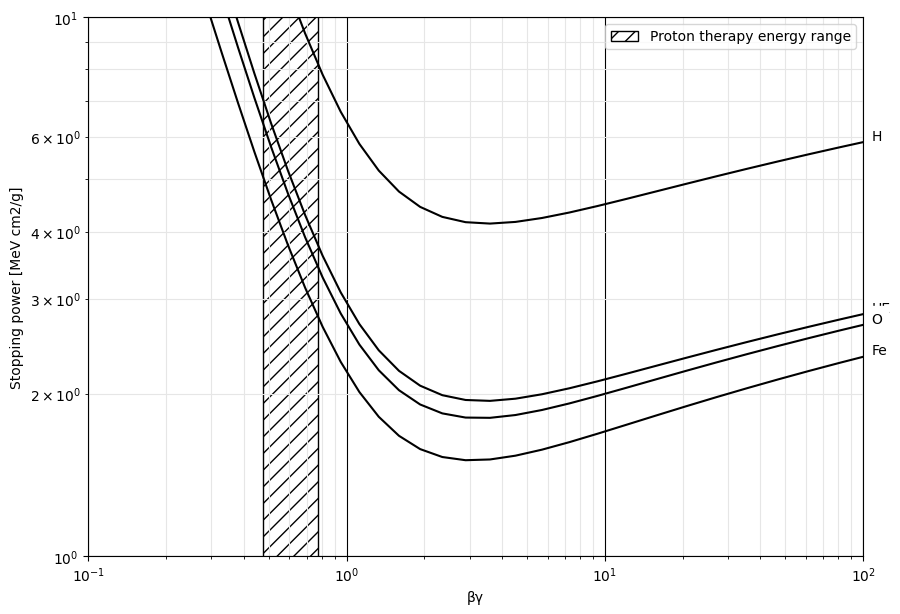

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 7))

betagamma = lambda x: beta(x)*gamma(x)

# Plot proton therapy application range
ax.fill_betweenx([0, 1.1*max(data.T[3])], betagamma(100), betagamma(250), 
                 hatch="//",
                 edgecolor='k', 
                 facecolor="white", 
                 label="Proton therapy energy range")

x = np.logspace(-1, 5)
for m in elements:
    ax.plot(betagamma(x), bethe(x, elements.get(m)), '-k')
    ax.text(betagamma(x)[-1], bethe(x, elements.get(m))[-1], m, backgroundcolor='w')

ax.set_ylabel("S [MeV cm^2 / g ]")
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(visible=True, which='major', color='k')
ax.grid(visible=True, which='minor', color=[0.9]*3)
ax.set_xlabel('βγ')
ax.set_ylabel('Stopping power [MeV cm2/g]')
ax.set_xlim(0.1, 1e2)
ax.set_ylim(1, 10)

ax.legend()
